In [1]:
import math
import numpy as np
import pandas as pd
from scipy.stats import bernoulli
import itertools
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# simulation Problem 2
z0 = [3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3]
p = 0.6
q = 0.1
n = 15
k = 3


def sample_maker(p, q, z0):
    n = len(z0)
    A = [[0] * n for i in range(n)]
    for i in range(0, n):
        A[i][i] = 1
        for j in range(0, i):
            if z0[i] == z0[j]:
                A[i][j] = np.random.binomial(1, p, size=1)[0]
                #bernoulli.rvs(p, size=1)
            else:
                A[i][j] = np.random.binomial(1, q, size=1)[0]
            A[j][i] = A[i][j]
    return A


A = [0] * 10
for i in range(10):
    A[i] = sample_maker(p, q, z0)
    print(A[i])


[[1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]]
[[1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], [0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1], [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0

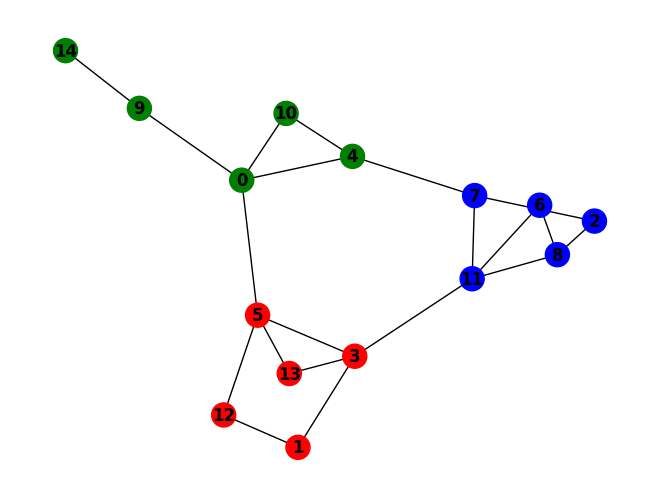

In [7]:
# simulation problem 3
G = nx.Graph()
G.add_nodes_from([i for i in range(0, n)])

for i in range(0, n):
    for j in range(0, i - 1):
        if A[0][j][i] == 1:
            G.add_edge(i, j)
color_map = []
for node in G:
    if z0[node] == 1:
        color_map.append("red")
    elif z0[node] == 2:
        color_map.append("blue")
    else:
        color_map.append("green")
nx.draw(G, with_labels=True, font_weight='bold', node_color=color_map)


In [9]:
# simulation problem 4
def hamming(z1, z2):
    ans = 0
    n = len(z1)
    for i in range(0, n):
        if z1[i] != z2[i]:
            ans += 1
    return ans


a = [1, 1, 1, 2, 3, 3, 2, 3, 2]
b = [1, 1, 3, 2, 3, 1, 2, 3, 2]
hamming(a, b)

2

In [10]:
# simulation problem 5
def min_hamming(z1, z2):
    z1_values = list(pd.Series(z1).value_counts().index)
    permutations = list(itertools.permutations(z1_values))
    ans = 1000000000
    for i in range(0, len(permutations)):
        tmp = [0] * len(z2)
        for j in range(0, len(z2)):
            tmp[j] = permutations[i][z2[j] - 1]
        if ans > hamming(tmp, z1):
            ans = hamming(tmp, z1)
    return ans

min_hamming(a, b)

2

In [11]:
# simulation problem 6
def mle(z, p, q, A):
    # a: same cluster connected (prob = p)
    # b: same cluster not connected (prob = 1-p)
    # c: different cluster connected (prob = q)
    # d: different cluster connected (prob = 1-q)
    a = 0
    b = 0
    c = 0
    d = 0
    for i in range(0, len(z)):
        for j in range(0, i):
            if z[i] == z[j]:
                a += A[i][j]
                b += 1 - A[i][j]
            else:
                c += A[i][j]
                d += 1 - A[i][j]
    return math.pow(p, a) * math.pow((1 - p), b) * math.pow(q, c) * math.pow((1 - q), d)


def log_mle(z, p, q, A):
    # a = 0
    # b = 0
    # c = 0
    # d = 0
    # for i in range(0, len(z)):
    #     for j in range(0, i):
    #         if z[i] == z[j]:
    #             a += A[i][j]
    #             b += 1 - A[i][j]
    #         else:
    #             c += A[i][j]
    #             d += 1 - A[i][j]
    # return a * math.log(p) + b * math.log(1 - p) + c * math.log(q) + d * math.log(1 - q)
    return math.log(mle(z, p, q, A))


def log_mle_hat(z, p, q, A):
    return -log_mle(z, p, q, A)

[1, 3, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2, 3, 3, 1]


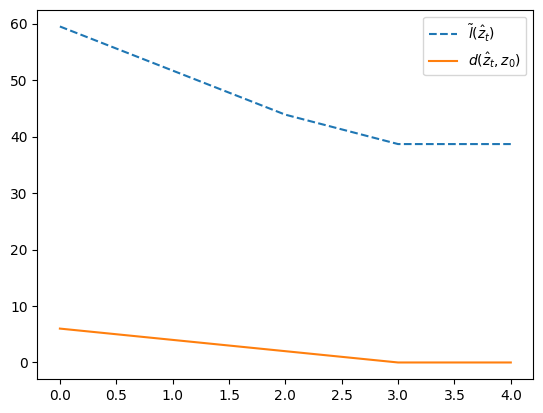

In [30]:
# simulation problem 7
init_estimate = [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]


def max_finder(z, p, q, A):
    n = len(z)
    min_log_mle_hat = z.copy()
    for i in range(0, n):
        for j in range(0, i):
            tmp = z.copy()
            tmp[i] = z[j]
            tmp[j] = z[i]
            if log_mle_hat(tmp, p, q, A) <= log_mle_hat(min_log_mle_hat, p, q, A):
                min_log_mle_hat = tmp.copy()
    return min_log_mle_hat


T = 5

z = init_estimate
log_mle_hat_list = [0] * T
min_hamming_list = [0] * T
for i in range(0, T):
    z = max_finder(z, p, q, A[0])
    log_mle_hat_list[i] = log_mle_hat(z, p, q, A[0])
    min_hamming_list[i] = min_hamming(z, z0)

x = np.arange(0, T, 1)
fig, ax = plt.subplots()
ax.plot(x, log_mle_hat_list, label="$\\tilde{l}(\hat{z}_t)$",linestyle="dashed")
ax.plot(x, min_hamming_list, label="$d(\hat{z}_t,z_0)$",linestyle="solid")
ax.legend()
print(z)


In [34]:
# simulation problem 8
def t_max_finder(T, z, p, q, A):
    for i in range(0, T):
        z = max_finder(z, p, q, A)
    return z


M = [[1, 1, 2, 3, 3, 3, 2, 3, 1, 1, 2, 2, 3, 1, 2],
     [2, 3, 1, 1, 1, 1, 1, 3, 3, 2, 3, 3, 2, 2, 2],
     [3, 3, 3, 2, 1, 2, 1, 3, 2, 3, 2, 2, 1, 1, 1],
     [1, 2, 3, 3, 3, 2, 2, 1, 1, 1, 3, 2, 2, 3, 1],
     [3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 1, 2, 2, 1, 1],
     [1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 1, 1],
     [3, 3, 2, 2, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 1],
     [3, 3, 3, 3, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1],
     [3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 1],
     [3, 2, 1, 3, 2, 1, 1, 2, 3, 1, 2, 3, 1, 2, 3],
     [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]]

for i in range(0, 11):
    tmp=t_max_finder(5, M[i], p, q, A[0])
    print("Estimation: ",tmp,",min_hamming:", min_hamming(tmp,z0))

Estimation:  [1, 3, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2, 3, 3, 1] ,min_hamming: 0
Estimation:  [2, 1, 3, 1, 2, 1, 3, 3, 3, 2, 2, 3, 1, 1, 2] ,min_hamming: 0
Estimation:  [3, 1, 2, 1, 3, 1, 2, 2, 2, 3, 3, 2, 1, 1, 3] ,min_hamming: 0
Estimation:  [3, 2, 1, 2, 3, 2, 3, 1, 1, 1, 3, 3, 2, 2, 1] ,min_hamming: 4
Estimation:  [2, 1, 3, 1, 2, 1, 3, 3, 3, 2, 2, 3, 1, 1, 2] ,min_hamming: 0
Estimation:  [2, 1, 3, 1, 2, 1, 2, 3, 3, 3, 2, 2, 1, 1, 3] ,min_hamming: 4
Estimation:  [2, 3, 1, 3, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 2] ,min_hamming: 0
Estimation:  [3, 2, 1, 2, 3, 2, 1, 1, 1, 3, 3, 1, 2, 2, 3] ,min_hamming: 0
Estimation:  [2, 3, 1, 3, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 2] ,min_hamming: 0
Estimation:  [2, 2, 3, 1, 2, 1, 3, 3, 3, 2, 2, 3, 1, 1, 1] ,min_hamming: 2
Estimation:  [1, 3, 2, 3, 1, 3, 2, 2, 2, 1, 1, 2, 3, 3, 1] ,min_hamming: 0


In [51]:
# 9 10 11 sim

In [50]:
x = np.array([0] * 9).reshape(3, 3)
x = [[0] * 2 for row in range(2)]
x
len(x)

2